2024-12-12 19:02:26.673894: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-12 19:02:26.686454: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734004946.700958   37155 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734004946.705021   37155 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-12 19:02:26.719563: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr


Step 1: Load Dataset


2024-12-12 19:02:27.946744: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-12-12 19:02:28.085794: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:376] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608
2024-12-12 19:02:28.095346: W tensorflow/core/kernels/data/cache_dataset_ops.cc:914] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2024-12-12 19:02:28.095682: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence



Step 2: Explore Dataset Information*
tfds.core.DatasetInfo(
    name='caltech101',
    full_name='caltech101/3.0.2',
    description="""
    Caltech-101 consists of pictures of objects belonging to 101 classes, plus one
    `background clutter` class. Each image is labelled with a single object. Each
    class contains roughly 40 to 800 images, totalling around 9k images. Images are
    of variable sizes, with typical edge lengths of 200-300 pixels. This version
    contains image-level labels only. The original dataset also contains bounding
    boxes.
    """,
    homepage='https://doi.org/10.22002/D1.20086',
    data_dir='data/caltech101/3.0.2',
    file_format=tfrecord,
    download_size=Unknown size,
    dataset_size=132.86 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/file_name': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=102),
    }),
    supervised_keys=('image', 'la

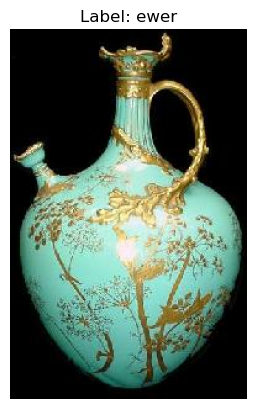


Step 5: Data Preprocessing and Augmentation

Step 6: Create the Model


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 102)            │       130,662 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,388,646 (9.11 MB)

 Trainable params: 130,662 (510.40 KB)

 Non-trainable params: 2,257,984 (8.61 MB)


Step 7: Compile the Model

Step 8: Add Early Stopping

Step 9: Train the Model
Epoch 1/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 32s 296ms/step - accuracy: 0.0929 - loss: 4.9087 - val_accuracy: 0.6847 - val_loss: 1.4696
Epoch 2/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 24s 232ms/step - accuracy: 0.5952 - loss: 1.6521 - val_accuracy: 0.7679 - val_loss: 0.9650
Epoch 3/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 25s 248ms/step - accuracy: 0.7293 - loss: 1.0436 - val_accuracy: 0.7873 - val_loss: 0.7949
Epoch 4/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 23s 225ms/step - accuracy: 0.7614 - loss: 0.8430 - val_accuracy: 0.7870 - val_loss: 0.7836
Epoch 5/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 23s 226ms/step - accuracy: 0.8185 - loss: 0.6667 - val_accuracy: 0.7927 - val_loss: 0.6903
Epoch 6/20
95/96 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.8324 - loss: 0.6087

In [ ]:
import tensorflow_datasets as tfds
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

"""
====================================================
About Dataset:
The Caltech101 dataset contains images from 101 object categories (e.g., “helicopter”, “elephant” and “chair” etc.) and 
a background category that contains the images not from the 101 object categories. 
For each object category, there are about 40 to 800 images, while most classes have about 50 images. 
The resolution of the image is roughly about 300×200 pixels.

Steps:
    1. Load Dataset
    2. Explore Dataset Information*
    3. Convert Dataset to DataFrame for Exploration
    4. Visualize Sample Data
    5. Data Preprocessing and Augmentation
    6. Create the Model*
    7. Compile the Model
    8. Add Early Stopping
    9. Train the Model*
    10.Evaluate and Save the Model
    11.Visualize Training History
====================================================
"""
import tensorflow_datasets as tfds
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# **Step 1: Load Dataset**
print("\nStep 1: Load Dataset")
tfds_dir = "data/" 
dataset, info = tfds.load(
    "caltech101", as_supervised=True, with_info=True, data_dir=tfds_dir
)

train_data, test_data = dataset["train"], dataset["test"]

# **Step 2: Explore Dataset Information**
print("\nStep 2: Explore Dataset Information*")
print(info)

label_names = info.features["label"].names
print(f"Label Names: {label_names}")

# **Step 3: Convert Dataset to DataFrame for Exploration**
print("\nStep 3: Convert Dataset to DataFrame for Exploration")
def tfds_to_dataframe(tf_dataset, num_samples=None):
    data = []
    for image, label in tf_dataset.take(num_samples or -1):
        image_array = image.numpy()
        label_value = label.numpy()
        data.append({
            "label": label_value,
            "image_shape": image_array.shape,
            "image_data": image_array
        })
    return pd.DataFrame(data)

train_df = tfds_to_dataframe(train_data, num_samples=10)
train_df["label_name"] = train_df["label"].apply(lambda x: label_names[x])
print(train_df.head())

# **Step 4: Visualize Sample Data**
print("\nStep 4: Visualize Sample Data")
plt.imshow(train_df.loc[5, "image_data"])
plt.title(f"Label: {train_df.loc[5, 'label_name']}")
plt.axis("off")
plt.savefig("outputs/image_sample.png")
plt.show()            


# **Step 5: Data Preprocessing and Augmentation**
print("\nStep 5: Data Preprocessing and Augmentation")
IMG_SIZE = 128
BATCH_SIZE = 32

def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = image / 255.0
    return image, label

# Data Augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

# Apply preprocessing and augmentation
train_data = train_data.map(preprocess).map(
    lambda x, y: (data_augmentation(x), y)
).shuffle(1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_data = test_data.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# **Step 6: Create the Model**
print("\nStep 6: Create the Model")
def create_model():
    base_model = tf.keras.applications.MobileNetV2(
        input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False, weights="imagenet"
    )
    base_model.trainable = False  # Freeze initial layers for fine-tuning

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dropout(0.5),
        layers.Dense(info.features["label"].num_classes, activation="softmax")
    ])
    return model

model = create_model()
model.summary()

# **Step 7: Compile the Model**
print("\nStep 7: Compile the Model")
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# **Step 8: Add Early Stopping**
print("\nStep 8: Add Early Stopping")
early_stopping = EarlyStopping(
    monitor="val_loss", patience=5, restore_best_weights=True
)

# **Step 9: Train the Model**
print("\nStep 9: Train the Model")
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=20,
    callbacks=[early_stopping]
)

# **Step 10: Evaluate and Save the Model**
print("\nStep 10: Evaluate and Save the Model")
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy}")

# model.save("caltech101_model.keras")
model.save('models/caltech101_cnn_model.keras')

# **Step 11: Visualize Training History**
print("\nStep 11: Visualize Training History")
plt.figure(figsize=(6, 4))
# Training and Validation Accuracy
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.savefig("outputs/Training_Validation_Accuracy.png")
plt.show()

# Training and Validation Loss
plt.figure(figsize=(6, 4))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.savefig("outputs/Training_Validation_Loss.png")
plt.show()
